In [1]:
import os
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def read_csv(file_name):
    df = pd.read_csv(file_name, header=None)
    df.columns = ['i','type','epoch','loss','acc']
    return df

def parse_df(df):
    runs = []
    for i in df['i'].unique():
        a = df[df['i'] == i]
        train = a[a['type'] == 'train']
        val = a[a['type'] == 'val']
        r = (train['loss'].to_numpy(),train['acc'].to_numpy(),
             val['loss'].to_numpy(),val['acc'].to_numpy())
        runs.append(r)
    loss, acc, val_loss, val_acc = zip(*runs)
    return loss, acc, val_loss, val_acc

def get_average(loss, acc, val_loss, val_acc):
    loss_avg, acc_avg, val_loss_avg, val_acc_avg = np.zeros_like(loss[0]), \
                                                   np.zeros_like(acc[0]), \
                                                   np.zeros_like(val_loss[0]), \
                                                   np.zeros_like(val_acc[0])
    for i in range(len(loss)):
        loss_avg += loss[i]
        acc_avg += acc[i]
        val_loss_avg += val_loss[i]
        val_acc_avg += val_acc[i]
    loss_avg /= len(loss)
    acc_avg /= len(acc)
    val_loss_avg /= len(val_loss)
    val_acc_avg /= len(val_acc)
    return loss_avg, acc_avg, val_loss_avg, val_acc_avg

def get_std(loss, acc, val_loss, val_acc):
    loss_std, acc_std, val_loss_std, val_acc_std = np.zeros((len(loss), len(loss[0]))), \
                                                    np.zeros((len(acc), len(acc[0]))), \
                                                    np.zeros((len(val_loss), len(val_loss[0]))), \
                                                    np.zeros((len(val_acc), len(val_acc[0])))
    for i in range(len(loss)):
        loss_std[i] = loss[i]
        acc_std[i] = acc[i]
        val_loss_std[i] = val_loss[i]
        val_acc_std[i] = val_acc[i]

    loss_std = np.std(loss_std, axis=0)
    acc_std = np.std(acc_std, axis=0)
    val_loss_std = np.std(val_loss_std, axis=0)
    val_acc_std = np.std(val_acc_std, axis=0)
    return loss_std, acc_std, val_loss_std, val_acc_std


# XOR Plots

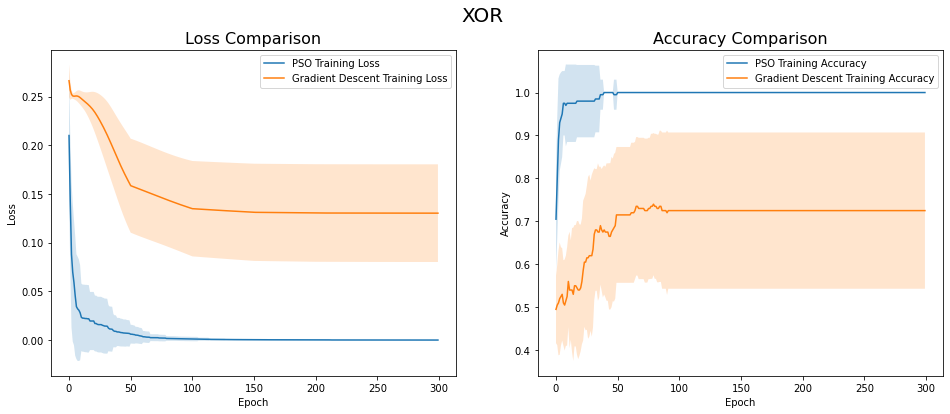

In [3]:
pso_xor_df = read_csv('data/pso_xor.csv')
nn_xor_df = read_csv('data/nn_xor.csv')
pso_loss_avg, pso_acc_avg, _, _ = get_average(*parse_df(pso_xor_df))
pso_loss_std, pso_acc_std, _, _ = get_std(*parse_df(pso_xor_df))
nn_loss_avg, nn_acc_avg, _, _ = get_average(*parse_df(nn_xor_df))
nn_loss_std, nn_acc_std, _, _ = get_std(*parse_df(nn_xor_df))


_, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
plt.suptitle('XOR', fontsize=20)

ax1.set_title('Loss Comparison', fontsize=16)
ax1.plot(pso_loss_avg, label='PSO Training Loss')
ax1.fill_between(range(len(pso_loss_avg)), pso_loss_avg-pso_loss_std, pso_loss_avg+pso_loss_std, alpha=0.2)
ax1.plot(nn_loss_avg, label='Gradient Descent Training Loss')
ax1.fill_between(range(len(nn_loss_avg)), nn_loss_avg-nn_loss_std, nn_loss_avg+nn_loss_std, alpha=0.2)
ax1.set_ylabel('Loss')
ax1.set_xlabel('Epoch')
ax1.legend()

ax2.set_title('Accuracy Comparison', fontsize=16)
ax2.plot(pso_acc_avg, label='PSO Training Accuracy')
ax2.fill_between(range(len(pso_acc_avg)), pso_acc_avg-pso_acc_std, pso_acc_avg+pso_acc_std, alpha=0.2)
ax2.plot(nn_acc_avg, label='Gradient Descent Training Accuracy')
ax2.fill_between(range(len(nn_acc_avg)), nn_acc_avg-nn_acc_std, nn_acc_avg+nn_acc_std, alpha=0.2)
ax2.set_ylabel('Accuracy')
ax2.set_xlabel('Epoch')
ax2.legend()

plt.savefig('img/xor_combined.png', dpi=500, transparent=False)
plt.show()


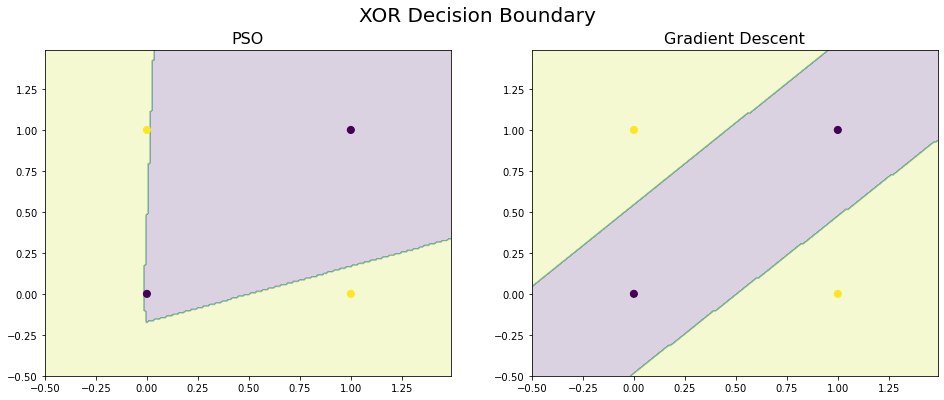

In [4]:
X_xor = np.array([0, 0, 0, 1, 1, 0, 1, 1]).reshape(-1, 2).astype(np.float64)
y_xor = np.array([0, 1, 1, 0]).reshape(-1, 1).astype(np.float64)

_, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
plt.suptitle('XOR Decision Boundary', fontsize=20)

ax1.set_title('PSO', fontsize=16)
X,Y,Z = pickle.load(open('data/pso_xor_boundary.pkl', 'rb'))
ax1.contourf(X, Y, Z, cmap='viridis', alpha=0.2)
ax1.scatter(X_xor[:, 0], X_xor[:, 1], c=y_xor, s=50)


ax2.set_title('Gradient Descent', fontsize=16)
X,Y,Z = pickle.load(open('data/nn_xor_boundary.pkl', 'rb'))
ax2.contourf(X, Y, Z, cmap='viridis', alpha=0.2)
ax2.scatter(X_xor[:, 0], X_xor[:, 1], c=y_xor, s=50)
plt.savefig('img/xor_dec_boundary.png', dpi=500, transparent=False)
plt.show()

# AND Plots

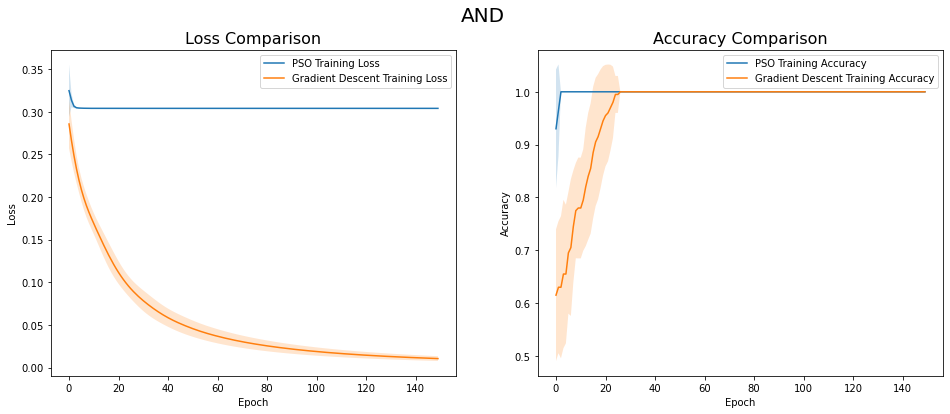

In [5]:
pso_and_df = read_csv('data/pso_and.csv')
nn_and_df = read_csv('data/nn_and.csv')
pso_loss_avg, pso_acc_avg, _, _ = get_average(*parse_df(pso_and_df))
pso_loss_std, pso_acc_std, _, _ = get_std(*parse_df(pso_and_df))
nn_loss_avg, nn_acc_avg, _, _ = get_average(*parse_df(nn_and_df))
nn_loss_std, nn_acc_std, _, _ = get_std(*parse_df(nn_and_df))


_, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
plt.suptitle('AND', fontsize=20)

ax1.set_title('Loss Comparison', fontsize=16)
ax1.plot(pso_loss_avg, label='PSO Training Loss')
ax1.fill_between(range(len(pso_loss_avg)), pso_loss_avg-pso_loss_std, pso_loss_avg+pso_loss_std, alpha=0.2)
ax1.plot(nn_loss_avg, label='Gradient Descent Training Loss')
ax1.fill_between(range(len(nn_loss_avg)), nn_loss_avg-nn_loss_std, nn_loss_avg+nn_loss_std, alpha=0.2)
ax1.set_ylabel('Loss')
ax1.set_xlabel('Epoch')
ax1.legend()

ax2.set_title('Accuracy Comparison', fontsize=16)
ax2.plot(pso_acc_avg, label='PSO Training Accuracy')
ax2.fill_between(range(len(pso_acc_avg)), pso_acc_avg-pso_acc_std, pso_acc_avg+pso_acc_std, alpha=0.2)
ax2.plot(nn_acc_avg, label='Gradient Descent Training Accuracy')
ax2.fill_between(range(len(nn_acc_avg)), nn_acc_avg-nn_acc_std, nn_acc_avg+nn_acc_std, alpha=0.2)
ax2.set_ylabel('Accuracy')
ax2.set_xlabel('Epoch')
ax2.legend()

plt.savefig('img/and_combined.png', dpi=500, transparent=False)
plt.show()

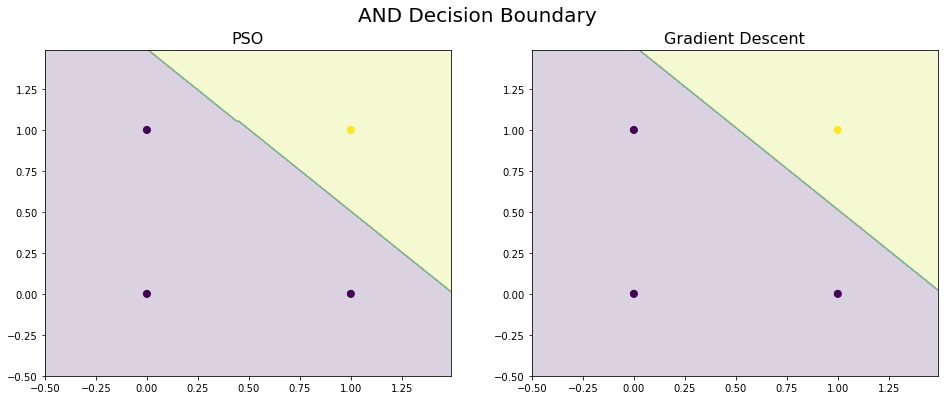

In [6]:
X_and = np.array([0, 0, 0, 1, 1, 0, 1, 1]).reshape(-1, 2).astype(np.float64)
y_and = np.array([0, 0, 0, 1]).reshape(-1, 1).astype(np.float64)

_, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
plt.suptitle('AND Decision Boundary', fontsize=20)

ax1.set_title('PSO', fontsize=16)
X,Y,Z = pickle.load(open('data/pso_and_boundary.pkl', 'rb'))
ax1.contourf(X, Y, Z, cmap='viridis', alpha=0.2)
ax1.scatter(X_and[:, 0], X_and[:, 1], c=y_and, s=50)


ax2.set_title('Gradient Descent', fontsize=16)
X,Y,Z = pickle.load(open('data/nn_and_boundary.pkl', 'rb'))
ax2.contourf(X, Y, Z, cmap='viridis', alpha=0.2)
ax2.scatter(X_and[:, 0], X_and[:, 1], c=y_and, s=50)
plt.savefig('img/and_dec_boundary.png', dpi=500, transparent=False)
plt.show()

# Synth Plots

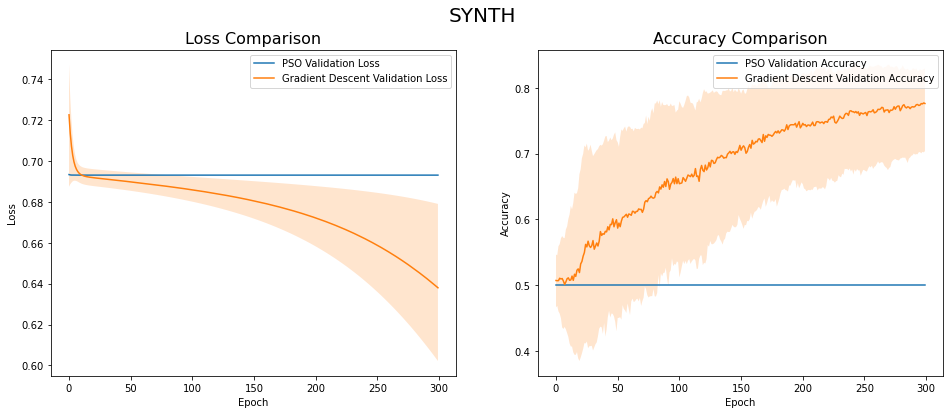

In [7]:
pso_synth_df = read_csv('data/pso_synth.csv')
nn_synth_df = read_csv('data/nn_synth.csv')
pso_loss_avg, pso_acc_avg, pso_val_loss_avg, pso_val_acc_avg = get_average(*parse_df(pso_synth_df))
pso_loss_std, pso_acc_std, pso_val_loss_std, pso_val_acc_std = get_std(*parse_df(pso_synth_df))
nn_loss_avg, nn_acc_avg, nn_val_loss_avg, nn_val_acc_avg = get_average(*parse_df(nn_synth_df))
nn_loss_std, nn_acc_std, nn_val_loss_std, nn_val_acc_std = get_std(*parse_df(nn_synth_df))

_, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
plt.suptitle('SYNTH', fontsize=20)

ax1.set_title('Loss Comparison', fontsize=16)
ax1.plot(pso_loss_avg, label='PSO Validation Loss')
ax1.fill_between(range(len(pso_val_loss_avg)), pso_val_loss_avg-pso_val_loss_std, pso_val_loss_avg+pso_val_loss_std, alpha=0.2)
ax1.plot(nn_loss_avg, label='Gradient Descent Validation Loss')
ax1.fill_between(range(len(nn_val_loss_avg)), nn_val_loss_avg-nn_val_loss_std, nn_val_loss_avg+nn_val_loss_std, alpha=0.2)
ax1.set_ylabel('Loss')
ax1.set_xlabel('Epoch')
ax1.legend()

ax2.set_title('Accuracy Comparison', fontsize=16)
ax2.plot(pso_acc_avg, label='PSO Validation Accuracy')
ax2.fill_between(range(len(pso_val_acc_avg)), pso_val_acc_avg-pso_val_acc_std, pso_val_acc_avg+pso_val_acc_std, alpha=0.2)
ax2.plot(nn_acc_avg, label='Gradient Descent Validation Accuracy')
ax2.fill_between(range(len(nn_val_acc_avg)), nn_val_acc_avg-nn_val_acc_std, nn_val_acc_avg+nn_val_acc_std, alpha=0.2)
ax2.set_ylabel('Accuracy')
ax2.set_xlabel('Epoch')
ax2.legend()

plt.savefig('img/synth_combined.png', dpi=500, transparent=False)
plt.show()

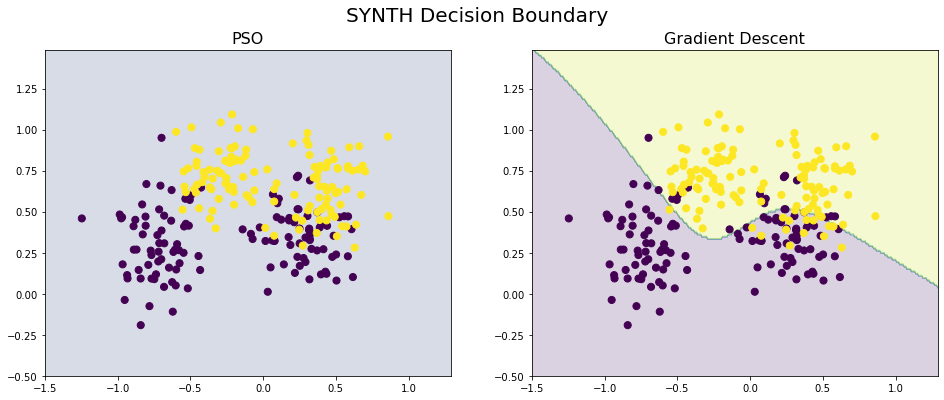

In [8]:

test_fn = os.path.join('dataset', 'synth.te')
data = np.loadtxt(test_fn)
X_synth = data[:, :-1]
y_synth = data[:, -1]


_, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
plt.suptitle('SYNTH Decision Boundary', fontsize=20)

ax1.set_title('PSO', fontsize=16)
X,Y,Z = pickle.load(open('data/pso_synth_boundary.pkl', 'rb'))
ax1.contourf(X, Y, Z, cmap='viridis', alpha=0.2)
ax1.scatter(X_synth[:, 0], X_synth[:, 1], c=y_synth, s=50)


ax2.set_title('Gradient Descent', fontsize=16)
X,Y,Z = pickle.load(open('data/nn_synth_boundary.pkl', 'rb'))
ax2.contourf(X, Y, Z, cmap='viridis', alpha=0.2)
ax2.scatter(X_synth[:, 0], X_synth[:, 1], c=y_synth, s=50)
plt.savefig('img/synth_dec_boundary.png', dpi=500, transparent=False)
plt.show()